# Seeded Poisson Factorization (SPF) example notebook

This notebook is a minimal example of the SPF model.

In [1]:
# Imports
from SPF.SPF_model import SPF
import numpy as np
import pandas as pd


df1 = pd.read_csv("./data/10k_amazon.csv")
df1.head()

,Unnamed: 0,productId,Title,userId,Helpfulness,Score,Time,Text,Cat1,Cat2,Cat3,tokens
0,15123,B00032G1S0,"Tuscan Whole Milk, 1 Gallon, 128 fl oz",A3B4TGHT06VIV9,19/20,5.0,1220659200,"It is a Tuscan Milkman,And he stoppeth only me...",grocery gourmet food,dairy eggs,milk,106
1,29859,B000O1LEK0,Kid Galaxy Mega X Morphibian Komodo dragon,A29BL1ME0A4S0U,1/1,4.0,1306800000,This is a fun car. The only problem is the sho...,toys games,electronics for kids,unknown,52
2,25129,B000G7WU50,Boon Flo Water Deflector and Protective Faucet...,A1M2CJJ859SZV7,1/1,2.0,1285372800,This does indeed deflect the water for a softe...,baby products,safety,bathroom safety,284
3,20101,B000K50KVO,Playtex Baby Einstein 6oz. Spill-Proof Trainer...,A1YU39HHJTF0F0,0/0,1.0,1254700800,because my little girl loves to chew on her si...,baby products,feeding,solid feeding,46
4,18841,B0001E8BJ2,Pre~Seed Intimate Moisturizer with 2 Early Pre...,A17YQZH6BBY9O4,2/2,5.0,1244851200,We got pregnant after using this product only ...,health personal care,health care,family planning contraceptives,49


In [2]:
# Define keywords
pets = ["dog", "cat", "cats", "dogs", "box", "food", "toy", "pet"]
toys = ["toy", "game", "play", "fun", "son", "daughter", "kids", "playing", "christmas", "toys", "child", "gift"]
beauty = ["skin", "color", "scent", "smell", "dry", "face", "look", "fragrance", "products", "dry", "perfume", "shampoo"]
baby = ["baby", "seat", "son", "daughter", "newborn", "months", "diaper", "diapers", "car", "stroller", "pump", "bag", "child"]
health = ["try", "long", "water", "feel", "shave", "razor", "shaver", "pain", "heart", "tooth", "balm", "pads", "taste", "drink","medical", "blade", "oil", "plastic", "shaker", "soap"]
grocery = ["tea", "taste", "flavor", "coffee", "chocolate", "sugar", "milk", "delicious", "water", "diet"]

keywords = {"pet supplies": pets, "toys games": toys, "beauty": beauty, "baby products": baby, "health personal care": health, "grocery gourmet food": grocery}

## SPF model

In [3]:
# Initialize the model
spf1 = SPF(keywords = keywords, residual_topics=0)
spf1

Seeded Poisson Factorization (SPF) model initialized with 6 keyword topics and 0 residual topics.

In [4]:
# Read documents and create the data required in the backend
spf1.read_docs(df1["Text"])

In [5]:
# Train the model
spf1.model_train(lr = 0.1, epochs = 150, tensorboard = False)

Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Instructions for updating:
The `interpolate_nondiscrete` flag is deprecated; instead use `force_probs_to_zero_outside_support` (with the opposite sense).


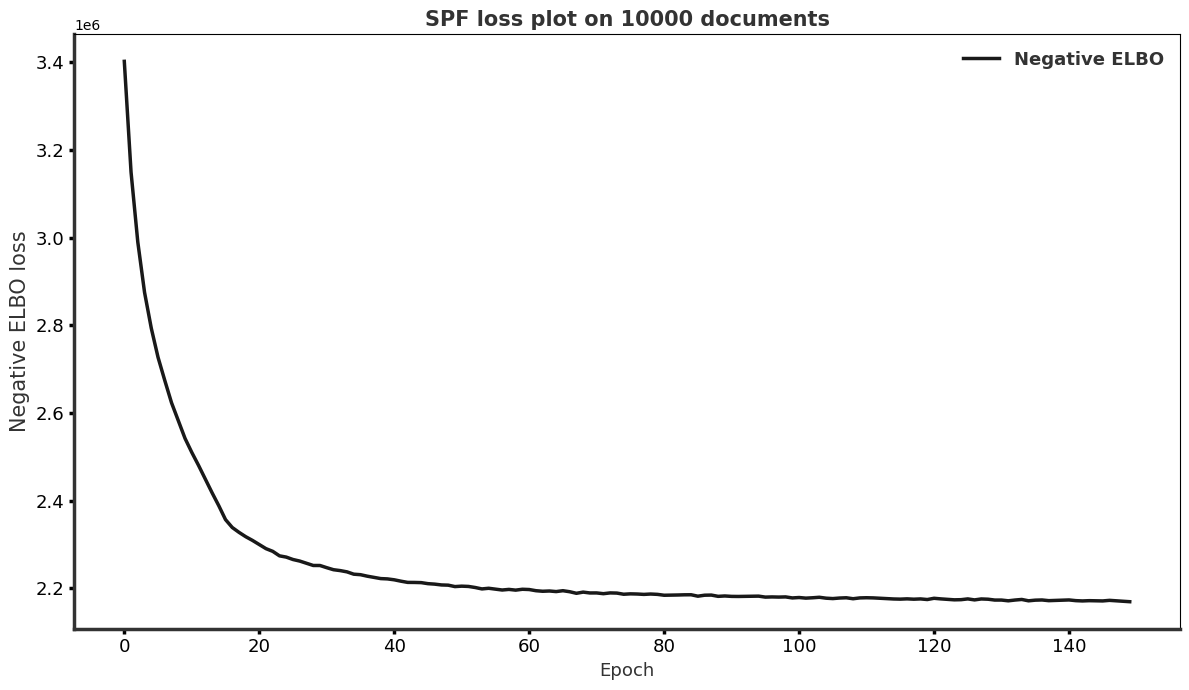

In [6]:
# See model results
spf1.plot_model_loss(neg_elbo = True)

In [9]:
betas = spf1.calculate_topic_word_distributions()
betas

,pet supplies,toys games,beauty,baby products,health personal care,grocery gourmet food
00,1.494989,0.023671,0.036112,0.016914,0.100031,0.243435
000,0.093962,0.056844,0.010407,0.044238,0.085287,0.192462
02,0.007777,0.012049,0.015039,0.050199,0.010833,0.010916
03,0.048401,0.010084,0.016640,0.006897,0.012871,0.012230
04,0.013248,0.010866,0.020378,0.053612,0.051733,0.010988
...,...,...,...,...,...,...
zoo,0.009956,0.016091,0.008396,0.073717,0.007877,0.008880
zoom,0.009391,0.071585,0.009781,0.008395,0.006933,0.009011
zords,0.007030,0.042852,0.009161,0.007930,0.009622,0.010219
zucchini,0.005881,0.007024,0.008285,0.007918,0.009477,0.053768


In [10]:
# Calculate model accuracy
categories, E_theta = spf1.calculate_topics()
df1["SPF_estimates"] = categories
df1["Accuracy"] = df1.Cat1 == df1.SPF_estimates

from sklearn.metrics import classification_report, confusion_matrix
import pprint
pprint.pprint(classification_report(df1.Cat1, df1.SPF_estimates))


('                      precision    recall  f1-score   support\n'
 '\n'
 '       baby products       0.69      0.79      0.74      1501\n'
 '              beauty       0.70      0.79      0.75      1374\n'
 'grocery gourmet food       0.63      0.89      0.74       855\n'
 'health personal care       0.80      0.48      0.60      2314\n'
 '        pet supplies       0.54      0.75      0.63      1253\n'
 '          toys games       0.91      0.81      0.86      2703\n'
 '\n'
 '            accuracy                           0.73     10000\n'
 '           macro avg       0.71      0.75      0.72     10000\n'
 '        weighted avg       0.76      0.73      0.73     10000\n')
